In [10]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

from sklearn.datasets import load_iris
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV

In [20]:
titanic=sns.load_dataset('titanic') 

In [21]:
titanic.dropna(subset=['age','embarked'], inplace=True)


In [18]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [ ]:
## 
titanic=pd.get_dummies(titanic, columns = ['sex','embarked','class'], drop_first=True)

TypeError: 'DataFrame' object is not callable

In [5]:
X =titanic.drop(['survived','deck','alone','who','adult_male','alive','embark_town'], axis =1)

In [6]:
X =X*1

In [7]:
y = titanic['survived']

In [8]:
## 훈련 데이터 나누기
X_train, X_test, y_train, y_test =train_test_split(X,y, test_size=0.2, random_state=111)

In [9]:
#모델 학습
model =LogisticRegression(max_iter=200)

In [34]:
X

,pclass,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S,class_Second,class_Third
0,3,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,3,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,3,35.0,0,0,8.0500,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
885,3,39.0,0,5,29.1250,0,1,0,0,1
886,2,27.0,0,0,13.0000,1,0,1,1,0
887,1,19.0,0,0,30.0000,0,0,1,0,0
889,1,26.0,0,0,30.0000,1,0,0,0,0


In [11]:
#SequentialFeatureSelector
#SFS (모델을 선정할 때 어떤 방법으로 선정할지, 선정방법, scoring =어떤 평가로 볼건지?, cv= 교차검증값들)

sfs_forward =SFS(model, k_features='best', forward=True, floating= False, scoring='accuracy',cv=3)
sfs_backward =SFS(model, k_features='best', forward=False, floating= False, scoring='accuracy',cv=3)
sfs_stepwise =SFS(model, k_features='best', forward=True, floating= True, scoring='accuracy',cv=3)


# 각 방법을 학습하고 확인해 보기 
sfs_forward_f=sfs_forward.fit(X_train, y_train)
sfs_backward_f=sfs_backward.fit(X_train, y_train)
sfs_stepwise_f=sfs_stepwise.fit(X_train, y_train)

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
c:\Users

AttributeError: `np.NINF` was removed in the NumPy 2.0 release. Use `-np.inf` instead.

In [12]:
#선택된 특성 출력

print('sfs_forward 피처 출력')
print(sfs_forward_f.k_feature_names_)

print('sfs_backward 피처 출력')
print(sfs_backward_f.k_feature_names_)

print('sfs_stepwise 피처 출력')
print(sfs_stepwise_f.k_feature_names_)

sfs_forward 피처 출력


NameError: name 'sfs_forward_f' is not defined

Text(0.5, 1.0, 'sfs_stepwise')

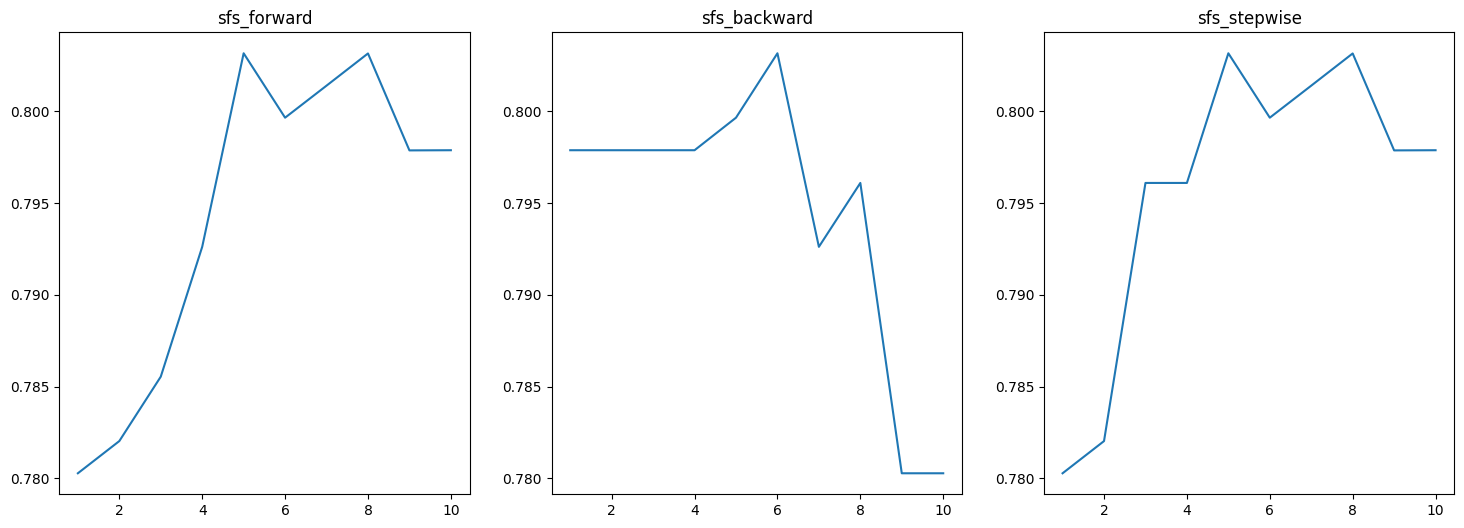

In [44]:
#시각화를 통해서 피처를 선택했을 때 어떤 식의 평가나오는지

fig, ax= plt.subplots(1,3, figsize=(18,6))
ax[0].plot(range(1, len(sfs_forward_f.subsets_)+1),[sfs_forward_f.subsets_[i]['avg_score'] for i in sfs_forward_f.subsets_],)
ax[0].set_title('sfs_forward')

ax[1].plot(range(1, len(sfs_backward_f.subsets_)+1),[sfs_backward_f.subsets_[i]['avg_score'] for i in sfs_backward_f.subsets_],)
ax[1].set_title('sfs_backward')

#fig, ax= plt.subplots(1,3, figsize=(18,6))
ax[2].plot(range(1, len(sfs_stepwise_f.subsets_)+1),[sfs_stepwise_f.subsets_[i]['avg_score'] for i in sfs_stepwise_f.subsets_],)
ax[2].set_title('sfs_stepwise')

## RFE
- RFE 모델을 사용해서 특성의 중요도를 평가 
    - 모델은 회귀나 분류
    - 타겟변수에 영향을 미치는 것들을 측정하는 것
    
- 순차적 특성 제거 :
    - 처음에는 전체 특성을 사용해 모델을 학습하고, 특성의 중요도 또는 가중치를 평가하여 중요도가 낮은 특성을 하나씩 제거한다.
    - 특성을 제거할 때마다 모델을 다시 학습시키면서 가장 중요하지 않은 것은 찾아내고 원하는 수의 특성만 남긴다.
- 반복적인 제거 과정 :
    - **지정된 특정 수까지 반복적으로 학습과 제거를 수행**
    
- 하이퍼파라미터
    - estimator - 특성의 중요도 모델 평가할 때 지정하는 것, 속성을 여러가지로 볼 수 있다. 
    - n_feature_to_select - 피처를 선택할 수 있다. 
    - step - 반복하면서 제거할 특성 수 step =1 1번에 1개 제거 이런 식으로 비율로도 제거 가능하다.

## RFECV

- 확장된 버전으로 교차검증을 통해서 최적의 특성 수를 자동으로 결정, 반복해서 특성 제거하면서 교차검증까지 수행하여 모델 평가 -> 특성 수를 찾는다.
    - **자동으로 특성의 수를 찾아주고**
- 하이퍼파라미터
    - min_feature_to_select - 최소 선택될 특성 수
    - cv 교차검증 분할수
    - scoring 모델 성능에 대한 평가 지표 

- **공통적으로 사용하는 함수는**
    - ranking_  특성 중요도
    - support_ 선택된 특성이 True 
    - n_features_ 선택된 특성의 개수
    - estimator_ 학습 완료된 상태 정보 확인

In [45]:
X,y = load_iris(return_X_y=True)

In [47]:
model = LogisticRegression(max_iter=200)

In [49]:
selector =RFE(estimator= model, n_features_to_select = 2)
selector =selector.fit(X,y)

In [51]:
print('선택된 특성 출력해바!',selector.support_)

선택된 특성 출력해바! [False False  True  True]


In [52]:
print('선택된 특성 출력해바!',selector.ranking_)

선택된 특성 출력해바! [3 2 1 1]


In [54]:
## RFECV
## 교차검증이 필요하다.

model =RandomForestClassifier()
cv = StratifiedKFold(3)

selector = RFECV(estimator= model, step=1, cv=cv)
selector=selector.fit(X,y)

In [57]:
print('최적의 수 ',selector.n_features_)
print('최적의 수 ',selector.support_)

최적의 수  2
최적의 수  [False False  True  True]


In [58]:
## RFECV 교차검증이 가능하니 여러 모델을 돌려서 비교해 보자!

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [60]:
titanic=sns.load_dataset('titanic') 
titanic.dropna(subset=['age','embarked'], inplace=True)


## 
titanic=pd.get_dummies(titanic, columns = ['sex','embarked','class'], drop_first=True)

X =titanic.drop(['survived','deck','alone','who','adult_male','alive','embark_town'], axis =1)
X=X*1
y = titanic['survived']

In [61]:
## 훈련 데이터 나누기
X_train, X_test, y_train, y_test =train_test_split(X,y, test_size=0.2, random_state=111)

In [ ]:
from sklearn.svm import SVC

In [70]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import RFECV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# 독립변수와 종속변수 설정
X = titanic.drop(['survived','deck','alone','who','adult_male','alive','embark_town'], axis=1) 
y = titanic['survived']

# 훈련 및 테스트 데이터셋으로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=111)

# 모델 정의
models = {
    'LogisticRegression': LogisticRegression(max_iter=200),
    'RandomForestClassifier': RandomForestClassifier(),
    'SVC': SVC(kernel='linear')
}

# 교차 검증 설정
cv = StratifiedKFold(3)

# 결과를 정리할 DataFrame
results = pd.DataFrame(columns=['Model', 'Dataset', 'Accuracy', 'Precision', 'Recall', 'F1', 'Selected Features'])

# 각 모델에 대해 RFECV 수행 및 결과 저장
for name, model in models.items():
    selector = RFECV(estimator=model, step=1, cv=cv, scoring='accuracy')
    selector.fit(X_train, y_train)
    
    # Train 및 Test 데이터셋에 대한 평가
    for data in [('Train', X_train, y_train), ('Test', X_test, y_test)]:
        dataset_name, X_data, y_data = data
        y_pred = selector.predict(X_data)
        
        accuracy = accuracy_score(y_data, y_pred)
        precision = precision_score(y_data, y_pred)
        recall = recall_score(y_data, y_pred)
        f1 = f1_score(y_data, y_pred)
        
        selected_features = ', '.join(X.columns[selector.support_])
        
        # 결과를 DataFrame에 추가
        result_row = pd.DataFrame({
            'Model': [name],
            'Dataset': [dataset_name],
            'Accuracy': [accuracy],
            'Precision': [precision],
            'Recall': [recall],
            'F1': [f1],
            'Selected Features': [selected_features]
        })
        results = pd.concat([results, result_row], ignore_index=True)
        
print(results)


/opt/anaconda3/envs/bda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/bda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

                    Model Dataset  Accuracy  Precision    Recall        F1  \
0      LogisticRegression   Train  0.799649   0.765854  0.704036  0.733645   
1      LogisticRegression    Test  0.825175   0.884615  0.707692  0.786325   
2  RandomForestClassifier   Train  0.985940   0.990868  0.973094  0.981900   
3  RandomForestClassifier    Test  0.811189   0.851852  0.707692  0.773109   
4                     SVC   Train  0.780316   0.737864  0.681614  0.708625   
5                     SVC    Test  0.776224   0.811321  0.661538  0.728814   

                                   Selected Features  
0  pclass, age, sibsp, parch, sex_male, embarked_...  
1  pclass, age, sibsp, parch, sex_male, embarked_...  
2                        pclass, age, fare, sex_male  
3                        pclass, age, fare, sex_male  
4                                           sex_male  
5                                           sex_male  


In [71]:
results

,Model,Dataset,Accuracy,Precision,Recall,F1,Selected Features
0,LogisticRegression,Train,0.799649,0.765854,0.704036,0.733645,"pclass, age, sibsp, parch, sex_male, embarked_..."
1,LogisticRegression,Test,0.825175,0.884615,0.707692,0.786325,"pclass, age, sibsp, parch, sex_male, embarked_..."
2,RandomForestClassifier,Train,0.985940,0.990868,0.973094,0.981900,"pclass, age, fare, sex_male"
3,RandomForestClassifier,Test,0.811189,0.851852,0.707692,0.773109,"pclass, age, fare, sex_male"
4,SVC,Train,0.780316,0.737864,0.681614,0.708625,sex_male
5,SVC,Test,0.776224,0.811321,0.661538,0.728814,sex_male


## 필수과제 1
- 데이터셋을 제공해 드릴 예정
- RFECV
- SFS 
    - 두 가지 방법론을 가지고 가장 중요한 피처를 선정하는 코드와 주석으로 정리해서 공유 주세요.
    - 도메인과 함께 어떤 피처를 선택하는 것이 좋겠다 라는 결론을 부탁드립니다.
    - 데이터셋은 마지막 수업 끝나고 같이 공유하면서 공유드리겠습니다.